In [2]:
import pandas as pd

# Load dataset with sentiment labels
df = pd.read_csv("test(in)_with_sentiment.csv")

# Ensure proper datetime
df['date'] = pd.to_datetime(df['date'])

# Filter only negative mails
negatives = df[df['sentiment'] == 'Negative'].copy()

# Sort by employee and date
negatives = negatives.sort_values(by=['from', 'date'])

# Rolling count of negative mails in 30 days
def rolling_flight_risk(group):
    group['neg_count_30d'] = (
        group.set_index('date')
             .rolling('30D')['sentiment']
             .count()
             .reset_index(drop=True)
    )
    return group

negatives = negatives.groupby('from', group_keys=False).apply(rolling_flight_risk)

# Flag employees who crossed threshold
flight_risk = negatives[negatives['neg_count_30d'] >= 4]

# Extract unique employees at risk
flight_risk_list = flight_risk.groupby('from').agg(
    First_Flag_Date=('date', 'min'),
    Total_Neg_Mails=('sentiment', 'count')
).reset_index()

# Save results
flight_risk_list.to_csv("flight_risk_employees.csv", index=False)

print("✅ Flight risk employees identified and saved!")

print("\n📌 Sample flagged employees:")
print(flight_risk_list.head(10))


✅ Flight risk employees identified and saved!

📌 Sample flagged employees:
                          from First_Flag_Date  Total_Neg_Mails
0  bobette.riner@ipgdirect.com      2010-04-21                9
1       don.baughman@enron.com      2010-01-26               11
2          eric.bass@enron.com      2010-09-03                5
3        john.arnold@enron.com      2010-01-10               10
4      johnny.palmer@enron.com      2010-03-25                4
5      kayne.coulter@enron.com      2010-02-06                4
6      lydia.delgado@enron.com      2010-10-10                7
7     patti.thompson@enron.com      2010-01-12                7
8      rhonda.denton@enron.com      2010-04-09                8
9         sally.beck@enron.com      2010-05-13                7


C:\Users\aryan\AppData\Local\Temp\ipykernel_9956\2476529590.py:21: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
c:\Users\aryan\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


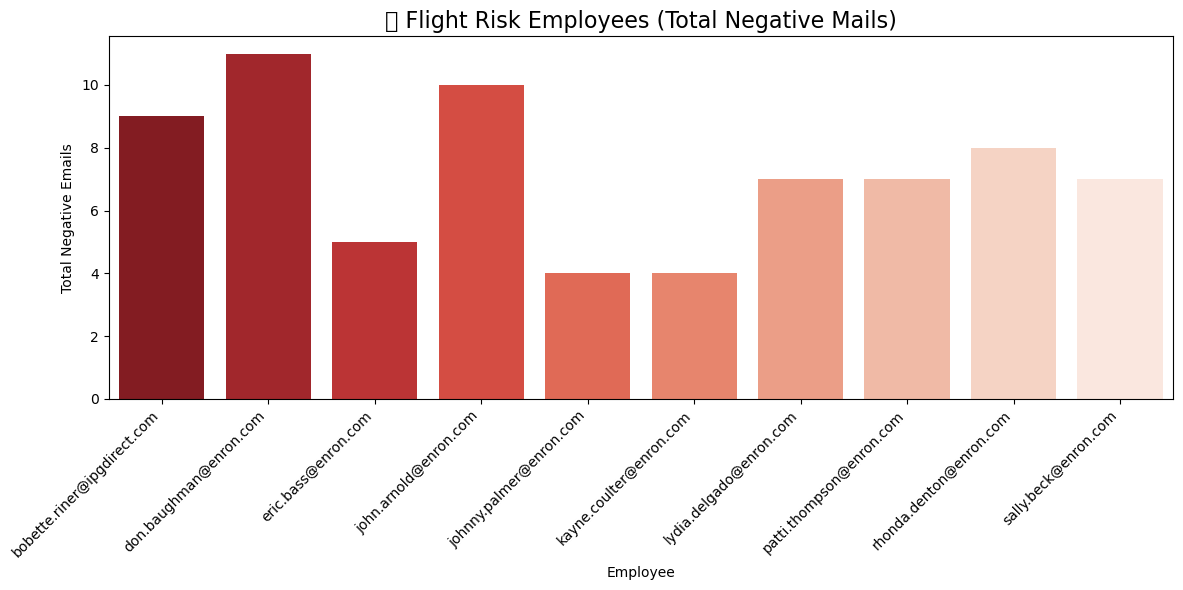

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load flight risk employees
flight_risk_list = pd.read_csv("flight_risk_employees.csv")

# ---------------------------
# Visualization 1: Bar Chart
# ---------------------------
plt.figure(figsize=(12, 6))
sns.barplot(
    data=flight_risk_list,
    x="from", y="Total_Neg_Mails",
    palette="Reds_r"
)
plt.title("📊 Flight Risk Employees (Total Negative Mails)", fontsize=16)
plt.xlabel("Employee")
plt.ylabel("Total Negative Emails")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()
